# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

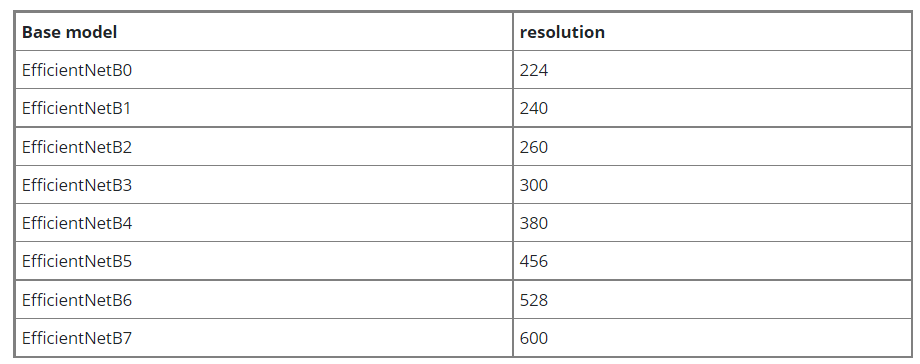

# Data Pre Processing

In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['earphone', 'headphone', 'phones']
Types of classes labels found:  3


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

     Labels                         image
0  earphone  dataset_path/earphone/21.png
1  earphone  dataset_path/earphone/22.png
2  earphone  dataset_path/earphone/23.png
3  earphone  dataset_path/earphone/24.png
4  earphone  dataset_path/earphone/25.png
     Labels                           image
98   phones  dataset_path/phones/phs112.png
99   phones  dataset_path/phones/phs123.jpg
100  phones  dataset_path/phones/phs123.png
101  phones  dataset_path/phones/phs157.png
102  phones  dataset_path/phones/phs165.png


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  103
headphone    50
phones       29
earphone     24
Name: Labels, dtype: int64


In [5]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(103, 224, 224, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'earphone' 'earphone' 'earphone' 'earphone' 'earphone' 'earphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'headphone' 'headphone' 'headphone' 'headphone'
 'headphone' 'headphone' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'pho

In [8]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(97, 224, 224, 3)
(97, 3)
(6, 224, 224, 3)
(6, 3)



# EfficientNet Implementation :



In [10]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [11]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 3)                 4053414   
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/30
4/4 - 6s - loss: 8.2172 - accuracy: 0.3402
Epoch 2/30
4/4 - 5s - loss: 3.5772 - accuracy: 0.2887
Epoch 3/30
4/4 - 4s - loss: 3.6683 - accuracy: 0.4124
Epoch 4/30
4/4 - 3s - loss: 2.9720 - accuracy: 0.5773
Epoch 5/30
4/4 - 1s - loss: 1.6091 - accuracy: 0.6598
Epoch 6/30
4/4 - 1s - loss: 1.6499 - accuracy: 0.6186
Epoch 7/30
4/4 - 1s - loss: 0.8478 - accuracy: 0.6598
Epoch 8/30
4/4 - 1s - loss: 0.8477 - accuracy: 0.7216
Epoch 9/30
4/4 - 1s - loss: 0.6787 - accuracy: 0.8247
Epoch 10/30
4/4

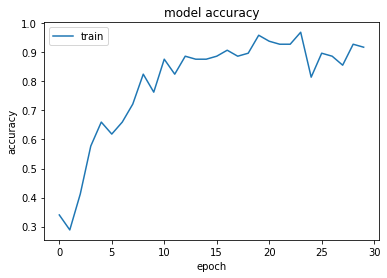

In [12]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [13]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 0s 2ms/step - loss: 1.7834 - accuracy: 0.3333
Loss = 1.7833582162857056
Test Accuracy = 0.3333333432674408


# Testing Efficient Model On Unseen data

Input image shape: (1, 224, 224, 3)


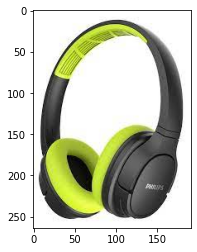

In [14]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'unseen.jfif'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [15]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

array([[0.01885055, 0.2305208 , 0.7506286 ]], dtype=float32)

In [18]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [21]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    cpu_performance

Epoch 1/30
4/4 - 10s - loss: 0.0314 - accuracy: 0.9794
Epoch 2/30
4/4 - 10s - loss: 0.0112 - accuracy: 1.0000
Epoch 3/30
4/4 - 10s - loss: 0.0575 - accuracy: 0.9794
Epoch 4/30
4/4 - 10s - loss: 0.0127 - accuracy: 1.0000
Epoch 5/30
4/4 - 10s - loss: 0.1307 - accuracy: 0.9691
Epoch 6/30
4/4 - 9s - loss: 0.1140 - accuracy: 0.9588
Epoch 7/30
4/4 - 10s - loss: 0.1884 - accuracy: 0.9485
Epoch 8/30
4/4 - 10s - loss: 0.1041 - accuracy: 0.9485
Epoch 9/30
4/4 - 9s - loss: 0.1310 - accuracy: 0.9794
Epoch 10/30
4/4 - 10s - loss: 0.1590 - accuracy: 0.9485
Epoch 11/30
4/4 - 10s - loss: 0.0269 - accuracy: 0.9897
Epoch 12/30
4/4 - 10s - loss: 0.3513 - accuracy: 0.9381
Epoch 13/30
4/4 - 10s - loss: 0.0182 - accuracy: 0.9897
Epoch 14/30
4/4 - 10s - loss: 0.1573 - accuracy: 0.9278
Epoch 15/30
4/4 - 10s - loss: 0.1249 - accuracy: 0.9588
Epoch 16/30
4/4 - 10s - loss: 0.2126 - accuracy: 0.9278
Epoch 17/30
4/4 - 10s - loss: 0.0770 - accuracy: 0.9691
Epoch 18/30
4/4 - 10s - loss: 0.0753 - accuracy: 0.9691
Epo

In [22]:

%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    gpu_performance

Epoch 1/30
4/4 - 1s - loss: 0.2818 - accuracy: 0.9278
Epoch 2/30
4/4 - 1s - loss: 0.1793 - accuracy: 0.9588
Epoch 3/30
4/4 - 1s - loss: 0.1113 - accuracy: 0.9588
Epoch 4/30
4/4 - 1s - loss: 0.1415 - accuracy: 0.9588
Epoch 5/30
4/4 - 1s - loss: 0.3826 - accuracy: 0.9485
Epoch 6/30
4/4 - 1s - loss: 0.0562 - accuracy: 0.9794
Epoch 7/30
4/4 - 1s - loss: 0.1397 - accuracy: 0.9691
Epoch 8/30
4/4 - 1s - loss: 0.2192 - accuracy: 0.9072
Epoch 9/30
4/4 - 1s - loss: 0.0741 - accuracy: 0.9588
Epoch 10/30
4/4 - 1s - loss: 0.3673 - accuracy: 0.9072
Epoch 11/30
4/4 - 1s - loss: 0.0513 - accuracy: 0.9794
Epoch 12/30
4/4 - 1s - loss: 0.0676 - accuracy: 0.9897
Epoch 13/30
4/4 - 1s - loss: 0.0743 - accuracy: 0.9794
Epoch 14/30
4/4 - 1s - loss: 0.0084 - accuracy: 1.0000
Epoch 15/30
4/4 - 1s - loss: 0.0847 - accuracy: 0.9691
Epoch 16/30
4/4 - 1s - loss: 0.0291 - accuracy: 0.9897
Epoch 17/30
4/4 - 1s - loss: 0.1700 - accuracy: 0.9381
Epoch 18/30
4/4 - 1s - loss: 0.0905 - accuracy: 0.9691
Epoch 19/30
4/4 - 1

In [ ]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds